# Extra 04/06 - PCA/LDA
## Minh Nguyen

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# import warnings
# warnings.filterwarnings('ignore')

In [63]:
df = pd.read_csv("student-mat_pass_fail.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,pass/fail
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [65]:
# split the data
features = df.drop('pass/fail', axis=1)
X = features
y = df['pass/fail']

# select the columns to be encoded
cols_to_encode = ['school', 'sex', 'address', 'famsize', 
                  'Pstatus', 'Mjob', 'Fjob', 'reason', 
                  'guardian', 'schoolsup', 'famsup', 'paid', 
                  'activities', 'nursery', 'higher', 'internet', 'romantic']
# perform one hot encoding
X_encoded = pd.get_dummies(X, columns=cols_to_encode)

# scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


## Using PCA

In [66]:
#Initialize the PCA model
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled, y)

In [67]:
pca.explained_variance_ratio_

array([0.08571405, 0.06005644])

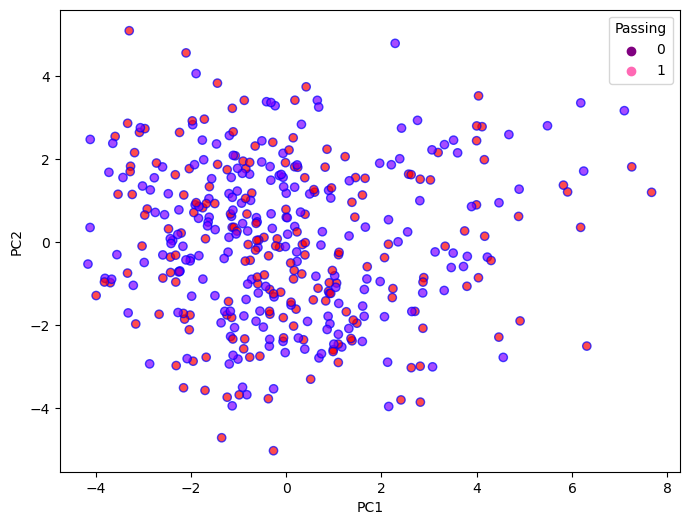

In [68]:
# Define the colors for the legend
colors = ['purple', 'hotpink']

# Create the scatter plot
plt.figure(figsize=(8,6))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(X_pca[:,0], 
            X_pca[:,1], 
            c = y, 
            cmap='rainbow',
            alpha = 0.7,
            edgecolor = 'b')

# Add a legend for the Passing values
for i, color in enumerate(colors):
    plt.scatter([], [], c=color, label=str(i), cmap='rainbow')
plt.legend(title='Passing', loc='best')

# Show the plot
plt.show()

## Using LDA

In [69]:
lda = LDA()
X_lda = lda.fit_transform(X_scaled, y)

In [70]:
lda.explained_variance_ratio_

array([1.])

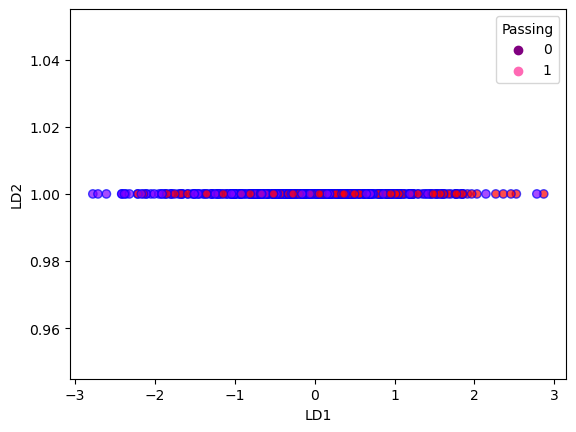

In [71]:
# # Create the scatter plot
# plt.xlabel('LD1')
# plt.ylabel('LD2')
# plt.scatter(X_lda[:,0], 
#             X_lda[:,1], 
#             c = y, 
#             cmap='rainbow',
#             alpha = 0.7,
#             edgecolor = 'b')
# plt.show()

# Define the LD2 array
def LD2(y):
    return np.array([1 for i in y])

# Create the scatter plot
plt.scatter(X_lda[:,0], 
            LD2(y), 
            c=y, 
            cmap='rainbow', 
            alpha = 0.7,
            edgecolor = 'b')

# Add labels for the x and y axes
plt.xlabel('LD1')
plt.ylabel('LD2')

# Add a legend for the 'Pass/Fail' labels
for i, color in enumerate(colors):
    plt.scatter([], [], c=color, label=str(i), cmap='rainbow')
plt.legend(title='Passing', loc='best')

# Show the plot
plt.show()

## Accuracy scores 

In [72]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy on test set: ")
    print(accuracy_score(y_test, y_pred))

### Accuracy score - none

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [74]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.5189873417721519
CPU times: user 135 ms, sys: 79.5 ms, total: 215 ms
Wall time: 131 ms


### Accuracy score - PCA

In [75]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

In [76]:
%%time
run_randomForest(X_train_pca, X_test_pca, y_train, y_test)

Accuracy on test set: 
0.4936708860759494
CPU times: user 131 ms, sys: 90.3 ms, total: 221 ms
Wall time: 133 ms


### Accuracy score - LDA

In [77]:
X_train_lda, X_test_lda, y_train, y_test = train_test_split(X_lda, y, test_size=0.2)

In [78]:
%%time
run_randomForest(X_train_lda, X_test_lda, y_train, y_test)

Accuracy on test set: 
0.5063291139240507
CPU times: user 137 ms, sys: 83.5 ms, total: 221 ms
Wall time: 149 ms
